##**Load data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_circles
# make_blob is used to generate non linear separable data

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [4]:
data, labels = make_circles(n_samples=1000,random_state=0,noise = 0.1,factor=0.6)
print(data.shape,"\n", labels.shape)

#centres = 4 : 0,1,2,3 it tells us how many clusters we want

(1000, 2) 
 (1000,)


##**Plot data**

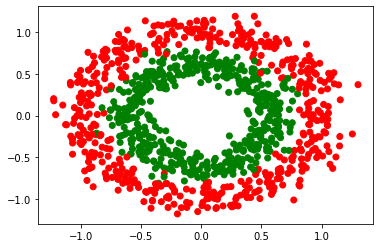

In [8]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap=my_cmap)
plt.show()

##**Train Test Split**

In [11]:
X_train,X_test, Y_train, Y_test = train_test_split(data,labels,stratify=labels,random_state=0)
print(data.shape,X_train.shape,X_test.shape)
print(labels.shape,Y_train.shape,Y_test.shape)

(1000, 2) (750, 2) (250, 2)
(1000,) (750,) (250,)


##**Model**

In [12]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, X):
    w = self.w
    b = self.b
    return np.dot(X,w.T) + b
  
  def sigmoid(self, X):
    aggregation = self.perceptron(X)
    return 1.0/(1.0 + np.exp(-aggregation))
  
  def compute_loss(self,X,Y, loss_fn):
    Y_pred = self.sigmoid(X)
    if loss_fn == "mse":
      return mean_squared_error(Y_pred, Y)
    elif loss_fn == "ce":
      return log_loss(Y_pred, Y)
  
  def plot_loss(self,loss,loss_fn):
    plt.plot(loss)
    plt.xlabel('Epochs')
    if loss_fn == "mse" :
      plt.ylabel('Mean Squared Error')
    elif loss_fn == "ce" :
      plt.ylabel('Log Loss')
    plt.show()

  def grad_mse_w(self, X, Y):
    y_hat = self.sigmoid(X)
    dw = (y_hat - Y) * y_hat * ( 1 - y_hat ) * X
    return dw
  
  def grad_mse_b(self, X, Y):
    y_hat = self.sigmoid(X)
    db = (y_hat - Y) * y_hat * ( 1 - y_hat )
    return db
  
  def grad_ce_w(self,X,Y):
    y_hat = self.sigmoid(X)
    if Y == 0 :
      return  y_hat * X
    elif Y == 1 :
      return -1 * (1 - y_hat) * X
    else :
      raise ValueError("Y should be 0 or 1")
  
  def grad_ce_b(self,X,Y):
    y_hat = sigmoid(X)
    if Y == 0 :
      return  y_hat
    elif Y == 1 :
      return -1 * (1 - y_hat)
    else :
      raise ValueError("Y should be 0 or 1")
  
  def compute_gradient(self,X,Y,loss_fn):
    dw = 0
    db = 0
    for x,y in zip(X,Y):
      if loss_fn == "mse":
        dw += self.grad_mse_w(x, y)
        db += self.grad_mse_b(x, y) 
      elif loss_fn == "ce":
        dw += self.grad_ce_w(x, y)
        db += self.grad_ce_b(x, y)
    return dw, db
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  
  def binarised_output(self,X,Y):
    Y_hat = self.predict(X)
    Y_hat_binary = ((Y_hat) > (1-Y_hat)) * 1
    return Y_hat_binary

  
  def check_accuracy_score(self,X,Y):
    Y_hat_binary = self.binarised_output(X,Y)
    return accuracy_score(Y_hat_binary,Y) 
  
  def fit(self, X,Y,epochs=1, learning_rate=1,loss_fn = 'mse'):
    loss = {}
    
    self.w = np.random.randn(1,X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    max_accuracy_epoch = 0
    
    #best weights and best bias
    chkptw = np.ones((1, X.shape[1]))
    chkptb = 0
    
    #all weights and all bias
    weights_tensor = np.zeros((epochs, self.w.shape[0], self.w.shape[1]))
    bias_vector = []

    for epoch in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      loss[epoch] = self.compute_loss(X,Y,loss_fn)
      
      dw, db = self.compute_gradient(X,Y,loss_fn)
      m = X.shape[1]       
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      weights_tensor[epoch] = self.w
      bias_vector.append(self.b)
      
      accuracy[epoch] = self.check_accuracy_score(X,Y)
      if(accuracy[epoch]> max_accuracy):
        max_accuracy = accuracy[epoch]
        max_accuracy_epoch = epoch
        chkptw = self.w
        chkptb = self.b

    self.plot_loss(list(loss.values()),loss_fn)
    return  weights_tensor, bias_vector, accuracy, max_accuracy_epoch,max_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


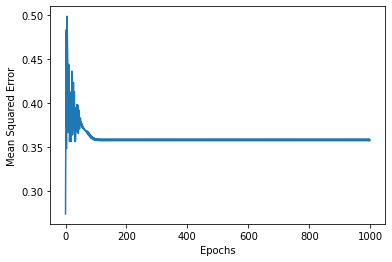

Max accuracy is :  105  at epoch :  0.6253333333333333
Train Accuracy is :  0.6253333333333333
Test Accuracy is :  0.584


In [13]:
sn = SigmoidNeuron()
weights, bias, accuracy, max_accuracy, index = sn.fit(X_train,Y_train,epochs=1000,learning_rate=1)
print("Max accuracy is : ", max_accuracy, " at epoch : ", index)
print("Train Accuracy is : ", accuracy[list(accuracy)[-1]])
print("Test Accuracy is : ", sn.check_accuracy_score(X_test,Y_test))

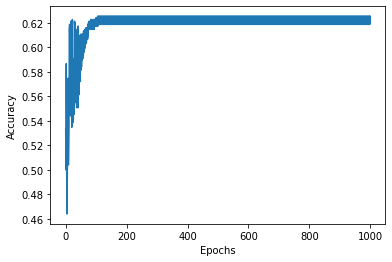

In [14]:
plt.plot(list(accuracy.values()))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [18]:
Y_pred = sn.binarised_output(X_train,Y_train).ravel()
print(Y_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 

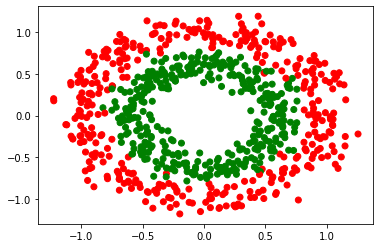

In [19]:
plt.scatter(X_train[:,0],X_train[:,1], c= Y_train, cmap=my_cmap)
plt.show()

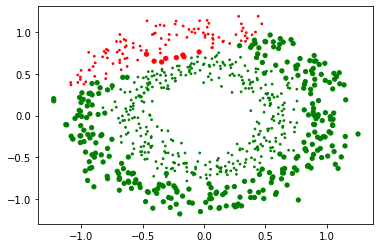

In [20]:
plt.scatter(X_train[:,0],X_train[:,1], c=Y_pred, cmap=my_cmap, s= 15*(np.abs(Y_pred - Y_train)+.2))
plt.show()